# Big Data Mart Sales Problem

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('bigdatamart_train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df= pd.read_csv("bigdatamart_train.csv")
df1 = pd.read_csv("bigdatamart_test.csv")

# making copies of train and test dataset
df= df.copy()
df1= df1.copy()

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
#checking shape of both datasets
print(df.shape)
print(df1.shape)

(8523, 12)
(5681, 11)


In [9]:
#combining both the datasets
data= pd.concat([df,df1])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [10]:
data.shape

(14204, 12)

# Data Visualizations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

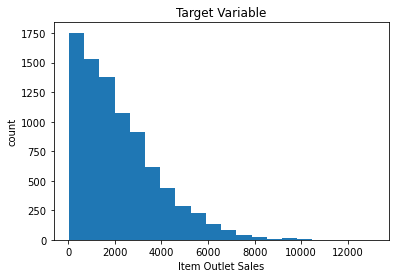

In [12]:
plt.hist(df['Item_Outlet_Sales'],bins = 20)
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.title('Target Variable')
plt.show()

In [13]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

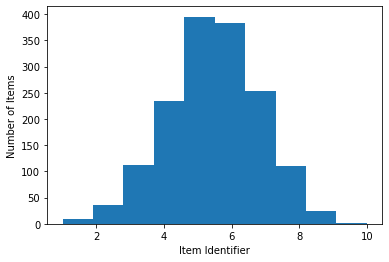

In [15]:
# we will analyze only the training set
df['Item_Identifier']
df['Item_Identifier'].value_counts().plot.hist()
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.show()

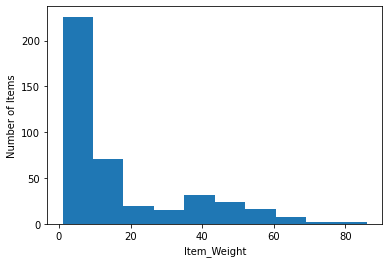

In [16]:
df['Item_Weight']
df['Item_Weight'].value_counts().plot.hist()
plt.xlabel('Item_Weight')
plt.ylabel('Number of Items')
plt.show()

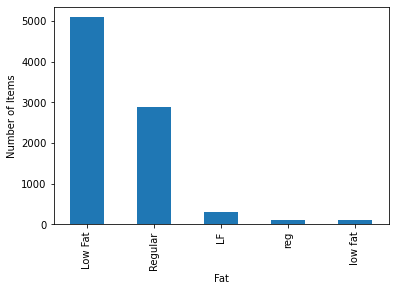

In [17]:
# checking different varieties of item fat content
df['Item_Fat_Content']
df['Item_Fat_Content'].value_counts().plot.bar()
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

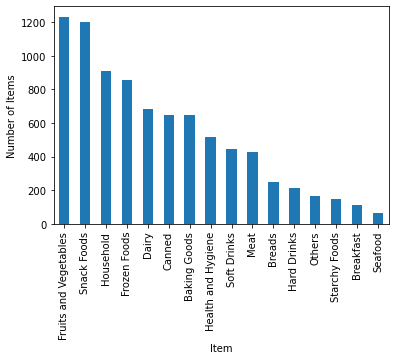

In [18]:
df['Item_Type']
df['Item_Type'].value_counts().plot.bar()
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

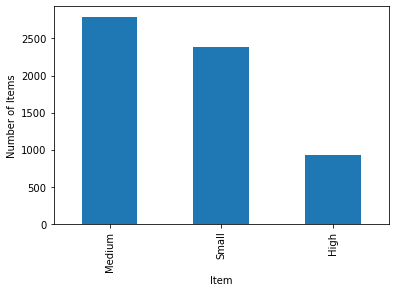

In [19]:
df['Outlet_Size']
df['Outlet_Size'].value_counts().plot.bar()
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

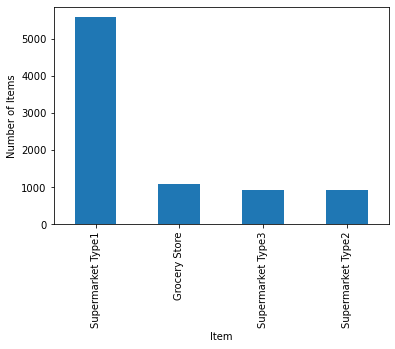

In [20]:
df['Outlet_Type']
df['Outlet_Type'].value_counts().plot.bar()
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

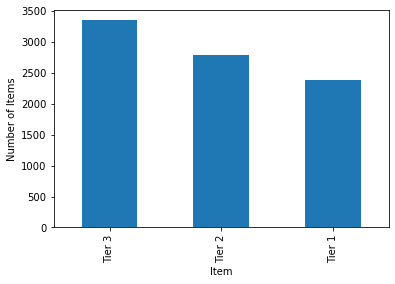

In [21]:
df['Outlet_Location_Type']
df['Outlet_Location_Type'].value_counts().plot.bar()
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

# Checking null values

In [22]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [43]:
dataa = df
dataa['Item_Weight']=dataa['Item_Weight'].fillna(dataa['Item_Weight'].mean())
dataa['Outlet_Size']=dataa['Outlet_Size'].fillna(dataa['Outlet_Size'].mode())
dataa['Item_Outlet_Sales']=dataa['Item_Outlet_Sales'].fillna(dataa['Item_Outlet_Sales'].mode())
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
16    1550
9     1550
14    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [46]:
# label encoding
from sklearn.preprocessing import LabelEncoder
data.apply(LabelEncoder().fit_transform)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,284,1097,7567,4,2541,4,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,57,1436,632,8,422,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,376,1172,3897,4,1639,4,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,393,0,5626,3,670,5,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,265,0,848,1,865,7,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,298,718,3881,2,1692,6,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,180,11820,5069,8,1692,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,293,8009,3196,5,1692,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5679,354,0,6626,7,1692,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [47]:
# one hot encoding
data = pd.get_dummies(data)
print(data.shape)

(14204, 1603)


In [48]:
# splitting the data into dependent and independent variables
x = data.drop('Item_Outlet_Sales',axis=1)
y = data.Item_Outlet_Sales

In [49]:
print(x.shape)
print(y.shape)

(14204, 1602)
(14204,)


In [54]:
# splitting the dataset into train and test
train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

In [55]:
print(train.shape)
print(test.shape)

(8523, 1603)
(5681, 1603)


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
lr = LinearRegression()
lr.fit(x_train, y_train)

# predicting the  test set results
y_pred = lr.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[1404. 2036. 2524. ... 3232. 3272. 2132.]
RMSE : 1126.612648771658
Variance score: 0.22


# Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)

# predicting the  test set results
y_pred =rf.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[1414.39224953 1634.43736375 2329.10057024 ... 2564.40632511 3381.93880634
 2057.55635019]
RMSE : 1099.9239687364234
Variance score: 0.26


# Gradient Boosting Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor()
gb.fit(x_train, y_train)

# predicting the test set results
y_pred = gb.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[1602.26809833 1853.50911457 3246.38258895 ... 2759.00890622 2982.07765148
 2116.47727431]
RMSE : 1024.2133377712487


# Support Vector Regressor

In [71]:
from sklearn.svm import SVR

svr= SVR()
svr.fit(x_train, y_train)

# predicting the x test results
y_pred = svr.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1275.4340338628872


# Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)

# predicting the test set results
y_pred = dtr.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[2181.28891358 2181.28891358 1035.9848     ... 2966.139      2181.28891358
 2181.28891358]
 RMSE :  1459.347995568521


# Cross Validation Score

In [73]:
from sklearn.model_selection import cross_val_score

cr= cross_val_score(lr, x, y, cv=5)
print('Cross Validation score of Linear Regression model is: ', cr.mean())

Cross Validation score of Linear Regression model is:  -2.2210608941085555e+30


In [75]:
cr= cross_val_score(rf, x, y, cv=5)
print('Cross Validation score of Random Forest Regressor model is: ', cr.mean())

Cross Validation score of Random Forest Regressor model is:  -2.2086960498812586e+30


In [76]:
cr= cross_val_score(svr, x, y, cv=5)
print('Cross Validation score of SVR model is: ', cr.mean())

Cross Validation score of SVR model is:  -6.567488130170887e+25


In [77]:
cr= cross_val_score(dtr, x, y, cv=5)
print('Cross Validation score of Decision Tree Regressor model is: ', cr.mean())

Cross Validation score of Decision Tree Regressor model is:  -4.00061258029755e+30


In [78]:
cr= cross_val_score(gb, x, y, cv=5)
print('Cross Validation score of Gradient Boosting Regressor model is: ', cr.mean())

Cross Validation score of Gradient Boosting Regressor model is:  -1.8098210149495773e+30
